# MOVIE LENS RECOMMENDATION SYSTEM

# Business Understanding



## Problem Statement


---


In today's world where consumers face an overwhelming abundance of choices, recommender systems are nolonger optional but essential for businesses to thrive and maintain a competitive edge in a data driven marketplace.

Recommender systems provide personalized guidance, thereby enhancing decision making and user satisfaction by predicting user preferences and surfacing relevant items such as movies, books, music and products from vast inventories through user past behaviour, preference or a combination of both.

Recommendation systems are pivotal in navigating the "Long Tail"—a phenomenon where niche, less-popular items collectively represent significant value but remain undiscovered without intelligent filtering.

By analyzing user behavior and leveraging predictive models, these systems drive customer engagement, loyalty, and profitability. For businesses, they unlock opportunities to monetize the Long Tail, improve retention, and deliver personalized experiences.

The Key Impact of recommender systems include :

            1.   User Experience: Simplify discovery in a sea of options, ensuring tailored recommendations.
            2.   Business Value: Increase sales, reduce choice overload, and capitalize on niche markets.
            3.   Competitive Edge: Transform vast inventories into curated, actionable insights for users.

## Overview
The goal of this project is to build a recommendation model that provides the top 5 personalized movie recommendations to a user based on their past ratings, preferences. By analyzing user preferences and comparing them with patterns in the ratings of other users or movies, the system aims to predict what a user would enjoy watching next.

Primarily, this project will recommend movies using Collaborative Filtering, and hybrid approach which will combine both content based and collaborative filtering to handle cold start cases


---


### Key Features

---
1. Dataset: MovieLens latest small having 100,000 ratings
2. Core method: Collaborative filtering approach
3. Evaluation Metrics:
4. Stretch goal: Hybrid approach for cold start issues


---

### Reasons for Chosing Project

---

1. Real World relevance:- Recommendation systems drive engagement in Platforms such as Amazon, Instagram, Reddit, Netflix and Google
2. Academic Benchmark:- MovieLens is a standard dataset for testing recommendation algorithms from the  GroupLens research lab at the University of Minnesota
3. Is a scalable solution capable of extending with Neural networks or hybrid models

## Objectives



---



1. Develop a collaborative filtering based recommendation system to predict user preferences
2. Provide personalized recommendations to enhance user engagement and satisfaction
3. Address the cold start problem i.e new users and or movies with no ratings


## Success criteria

1. Model Performance: Achieve a low RMSE prediction error of (RMSE<0.9) on test Data

2. User Satisfaction: Recommendations should align with user preferences  as evaluated via user feedback or online metrics

3. The system should be scalable to handle new users or movies efficiently


# Data understanding
The data seems to have been split between train and test data

In [1]:
#importing libraries to support in data understanding and cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# import the files
movies= pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')
tags=pd.read_csv('tags.csv')

In [3]:
# merge the csv files and rename user and timestamp columns as per table
df_merge = movies.merge(ratings, on="movieId")\
.merge(tags, on=("movieId"))
df_merge

,movieId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


In [4]:
df_merge = df_merge.rename(columns={
    'userId_x': 'userId_rating',
    'timestamp_x': 'timestamp_rating',
    'userId_y': 'userId_tag',
    'timestamp_y': 'timestamp_tag'
})

In [5]:
df_merge.shape

(233213, 9)

In [6]:
df_merge.tail()

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603
233212,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,remaster,1537098592


In [7]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233213 entries, 0 to 233212
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   movieId           233213 non-null  int64  
 1   title             233213 non-null  object 
 2   genres            233213 non-null  object 
 3   userId_rating     233213 non-null  int64  
 4   rating            233213 non-null  float64
 5   timestamp_rating  233213 non-null  int64  
 6   userId_tag        233213 non-null  int64  
 7   tag               233213 non-null  object 
 8   timestamp_tag     233213 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 17.8+ MB


In [8]:
df_merge.describe()

,movieId,userId_rating,rating,timestamp_rating,userId_tag,timestamp_tag
count,233213.000000,233213.000000,233213.000000,2.332130e+05,233213.000000,2.332130e+05
mean,12319.999443,309.688191,3.966535,1.213524e+09,470.683564,1.384774e+09
std,28243.919401,178.206387,0.968637,2.250448e+08,153.329632,1.534621e+08
min,1.000000,1.000000,0.500000,8.281246e+08,2.000000,1.137179e+09
25%,296.000000,156.000000,3.500000,1.017365e+09,424.000000,1.242494e+09
50%,1198.000000,309.000000,4.000000,1.217325e+09,477.000000,1.457901e+09
75%,4638.000000,460.000000,5.000000,1.443201e+09,599.000000,1.498457e+09
max,193565.000000,610.000000,5.000000,1.537799e+09,610.000000,1.537099e+09


#Data Cleaning

Handling null values

Dropping duplicates

Display and Clean Outliers



In [9]:
# check for missing values
df_merge.isna().sum()

movieId             0
title               0
genres              0
userId_rating       0
rating              0
timestamp_rating    0
userId_tag          0
tag                 0
timestamp_tag       0
dtype: int64

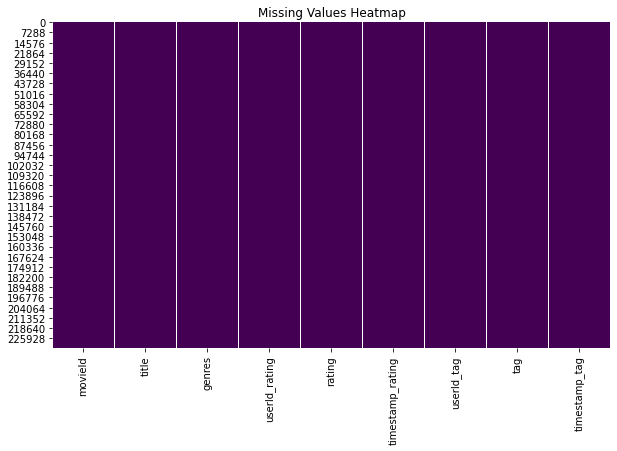

In [10]:
# missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_merge.isna(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
# check duplicates
df_merge.duplicated().sum()

0

In [12]:
# check for outliers in the dataset
Q1 = df_merge['rating'].quantile(0.25)
Q3 = df_merge['rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_merge[(df_merge['rating'] < lower_bound) | (df_merge['rating'] > upper_bound)]
outliers

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag
78,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76,0.5,1439165548,336,pixar,1139045764
79,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76,0.5,1439165548,474,pixar,1137206825
80,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,76,0.5,1439165548,567,fun,1525286013
741,2,Jumanji (1995),Adventure|Children|Fantasy,149,1.0,902084874,62,fantasy,1528843929
742,2,Jumanji (1995),Adventure|Children|Fantasy,149,1.0,902084874,62,magic board game,1528843932
...,...,...,...,...,...,...,...,...,...
233155,184471,Tomb Raider (2018),Action|Adventure|Fantasy,153,0.5,1525553051,62,Alicia Vikander,1528024914
233156,184471,Tomb Raider (2018),Action|Adventure|Fantasy,153,0.5,1525553051,62,video game adaptation,1528024898
233187,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,338,1.0,1530148465,62,Josh Brolin,1527274096
233188,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,338,1.0,1530148465,62,Ryan Reynolds,1527274092


In [13]:
df_merge.shape

(233213, 9)

In [14]:
# checking total count per rating
df_merge['rating'].value_counts()

4.0    64781
5.0    63845
4.5    31502
3.0    28550
3.5    22895
2.0     7955
2.5     6488
1.0     3721
0.5     1908
1.5     1568
Name: rating, dtype: int64

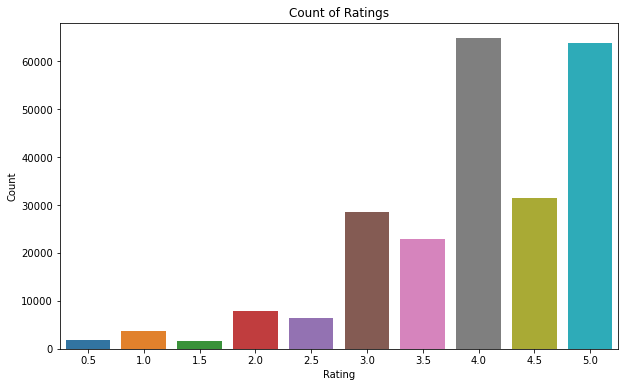

In [15]:
# visualize the counts
plt.figure(figsize=(10, 6))
sns.countplot(x=df_merge['rating'])
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

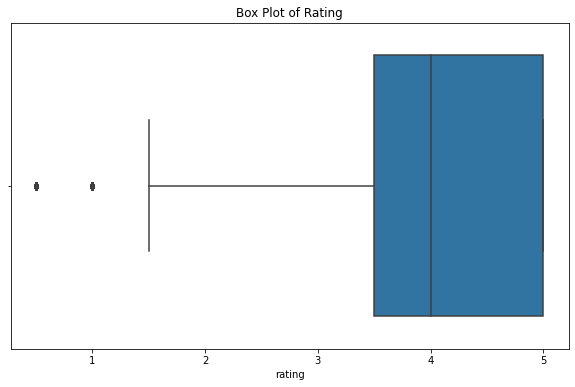

In [16]:
# plot outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merge['rating'])
plt.title('Box Plot of Rating')
plt.show()

In [17]:
# remove outliers
df_merge_cleaned = df_merge[(df_merge['rating'] >= lower_bound) & (df_merge['rating'] <= upper_bound)]
df_merge_cleaned

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


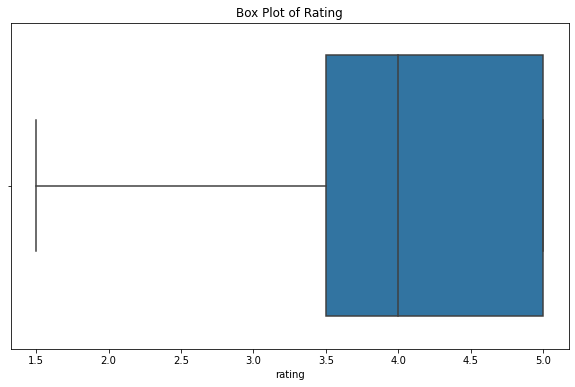

In [18]:
# plot the cleaned dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_merge_cleaned['rating'])
plt.title('Box Plot of Rating')
plt.show()

In [19]:
df_merge_cleaned.shape

(227584, 9)

In [20]:
# convert timestamp to datetime format
df_merge_cleaned['timestamp_rating'] = pd.to_datetime(df_merge_cleaned['timestamp_rating'], unit='s', errors='coerce')
df_merge_cleaned['timestamp_tag'] = pd.to_datetime(df_merge_cleaned['timestamp_tag'], unit='s', errors='coerce')
df_merge_cleaned

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,336,pixar,2006-02-04 09:36:04
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,474,pixar,2006-01-14 02:47:05
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,567,fun,2018-05-02 18:33:33
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08 06:36:02,336,pixar,2006-02-04 09:36:04
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08 06:36:02,474,pixar,2006-01-14 02:47:05
...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,2018-06-25 04:05:56,62,star wars,2018-06-14 00:02:32
233209,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,2018-09-16 11:49:14,184,anime,2018-09-16 11:49:42
233210,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,2018-09-16 11:49:14,184,comedy,2018-09-16 11:49:47
233211,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,2018-09-16 11:49:14,184,gintama,2018-09-16 11:50:03


In [21]:
# create new column from title by removing year of release from movie name
df_merge_cleaned['year'] = df_merge_cleaned['title'].str.extract(r'\((\d{4})\)')
df_merge_cleaned['title'] = df_merge_cleaned['title'].str.replace(r'\s*\(\d{4}\)$', '', regex=True)
df_merge_cleaned

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,336,pixar,2006-02-04 09:36:04,1995
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,474,pixar,2006-01-14 02:47:05,1995
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,567,fun,2018-05-02 18:33:33,1995
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08 06:36:02,336,pixar,2006-02-04 09:36:04,1995
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08 06:36:02,474,pixar,2006-01-14 02:47:05,1995
...,...,...,...,...,...,...,...,...,...,...
233208,187595,Solo: A Star Wars Story,Action|Adventure|Children|Sci-Fi,586,5.0,2018-06-25 04:05:56,62,star wars,2018-06-14 00:02:32,2018
233209,193565,Gintama: The Movie,Action|Animation|Comedy|Sci-Fi,184,3.5,2018-09-16 11:49:14,184,anime,2018-09-16 11:49:42,2010
233210,193565,Gintama: The Movie,Action|Animation|Comedy|Sci-Fi,184,3.5,2018-09-16 11:49:14,184,comedy,2018-09-16 11:49:47,2010
233211,193565,Gintama: The Movie,Action|Animation|Comedy|Sci-Fi,184,3.5,2018-09-16 11:49:14,184,gintama,2018-09-16 11:50:03,2010


In [22]:
# Split the 'genres' column by '|', then explode
df_exploded = df_merge_cleaned.copy()
df_exploded['genres'] = df_exploded['genres'].str.split('|')
df_exploded = df_exploded.explode('genres').reset_index(drop=True)
df_exploded

,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag,year
0,1,Toy Story,Adventure,1,4.0,2000-07-30 18:45:03,336,pixar,2006-02-04 09:36:04,1995
1,1,Toy Story,Animation,1,4.0,2000-07-30 18:45:03,336,pixar,2006-02-04 09:36:04,1995
2,1,Toy Story,Children,1,4.0,2000-07-30 18:45:03,336,pixar,2006-02-04 09:36:04,1995
3,1,Toy Story,Comedy,1,4.0,2000-07-30 18:45:03,336,pixar,2006-02-04 09:36:04,1995
4,1,Toy Story,Fantasy,1,4.0,2000-07-30 18:45:03,336,pixar,2006-02-04 09:36:04,1995
...,...,...,...,...,...,...,...,...,...,...
747116,193565,Gintama: The Movie,Sci-Fi,184,3.5,2018-09-16 11:49:14,184,gintama,2018-09-16 11:50:03,2010
747117,193565,Gintama: The Movie,Action,184,3.5,2018-09-16 11:49:14,184,remaster,2018-09-16 11:49:52,2010
747118,193565,Gintama: The Movie,Animation,184,3.5,2018-09-16 11:49:14,184,remaster,2018-09-16 11:49:52,2010
747119,193565,Gintama: The Movie,Comedy,184,3.5,2018-09-16 11:49:14,184,remaster,2018-09-16 11:49:52,2010


In [23]:
df_exploded['year'] = pd.to_datetime(df_exploded['year'], format='%Y', errors='coerce')
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747121 entries, 0 to 747120
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   movieId           747121 non-null  int64         
 1   title             747121 non-null  object        
 2   genres            747121 non-null  object        
 3   userId_rating     747121 non-null  int64         
 4   rating            747121 non-null  float64       
 5   timestamp_rating  747121 non-null  datetime64[ns]
 6   userId_tag        747121 non-null  int64         
 7   tag               747121 non-null  object        
 8   timestamp_tag     747121 non-null  datetime64[ns]
 9   year              747118 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(3), object(3)
memory usage: 57.0+ MB


In [24]:
# Create utility matrix (users as rows, movies as columns)
utility_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')

# Show a sample
print(utility_matrix.head())

movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     N

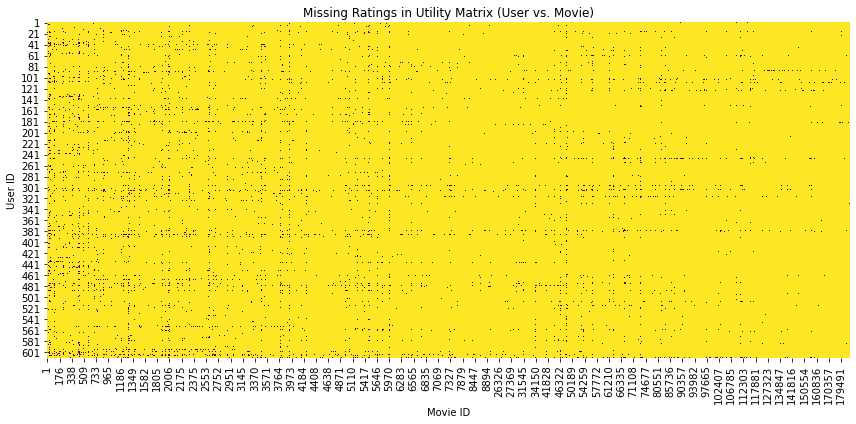

In [25]:
# plot size
plt.figure(figsize=(12, 6))

# Plot missing data (True = missing)
sns.heatmap(utility_matrix.isnull(), cbar=False, cmap='viridis')

plt.title("Missing Ratings in Utility Matrix (User vs. Movie)")
plt.xlabel("Movie ID")
plt.ylabel("User ID")
plt.tight_layout()
plt.show()

#Exploratory Data Analysis

## univariate analysis


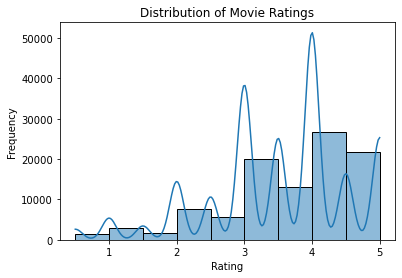

In [26]:
#
sns.histplot(ratings['rating'], bins=9, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

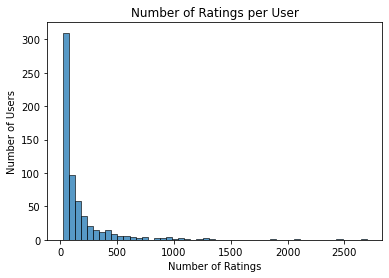

In [27]:
user_rating_counts = ratings['userId'].value_counts()

sns.histplot(user_rating_counts, bins=50, kde=False)
plt.title("Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

In [28]:
# Count number of ratings per user
user_rating_counts = df_merge_cleaned['userId_rating'].value_counts()

# Keep only users with at least 1 rating (i.e., user_rating_counts > 0 is always true, but it's okay for clarity)
active_users = user_rating_counts[user_rating_counts > 0].index

# Filter merged dataset to include only those active users
ratings_filtered = df_merge_cleaned[df_merge_cleaned['userId_rating'].isin(active_users)]

# Check shape or head
print(ratings_filtered.shape)

(227584, 10)


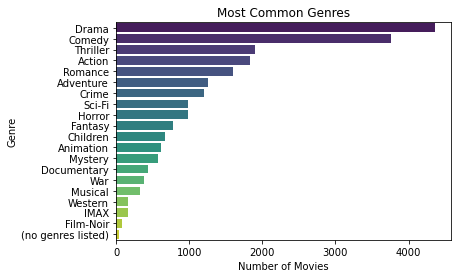

In [29]:
genre_counts = movies['genres'].str.split('|').explode().value_counts()

sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='viridis')
plt.title("Most Common Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

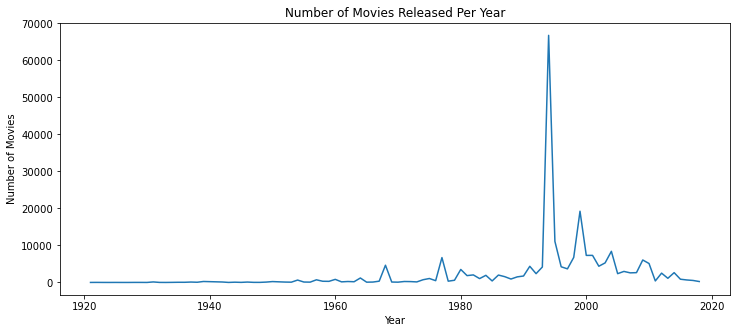

In [30]:
df_merge_cleaned['year'] = df_merge_cleaned['year'].dropna().astype(int)

yearly_counts = df_merge_cleaned['year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values)
plt.title("Number of Movies Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

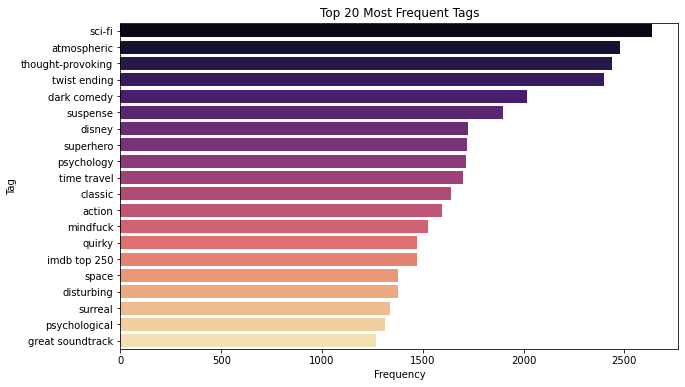

In [31]:
top_tags = df_merge_cleaned['tag'].str.lower().value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_tags.index, x=top_tags.values, palette='magma')
plt.title("Top 20 Most Frequent Tags")
plt.xlabel("Frequency")
plt.ylabel("Tag")
plt.show()

In [32]:
#  number of ratings per user
user_counts = ratings['userId'].value_counts()
user_counts

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
406      20
595      20
569      20
431      20
442      20
Name: userId, Length: 610, dtype: int64

# Bivariate analysis

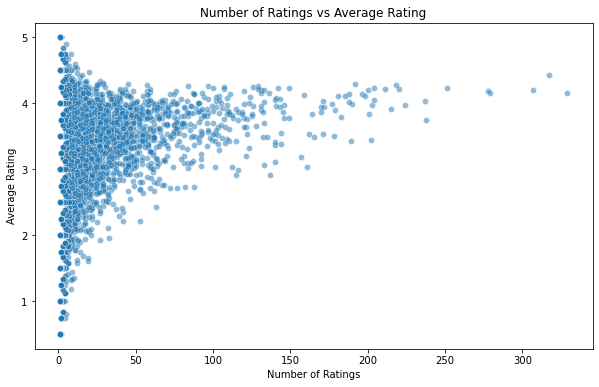

In [33]:
movie_stats = ratings.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(data=movie_stats, x='count', y='mean', alpha=0.5)
plt.title("Number of Ratings vs Average Rating")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.show()

In [34]:
#active_users = df_merge_cleaned['userId_rating'].value_counts()
#df_merge_rating = df_merge_cleaned[df_merge_cleaned['userId_rating'].isin(active_users[active_users ==0].index)]
#df_merge_rating.shape


## Mutivariate Analysis


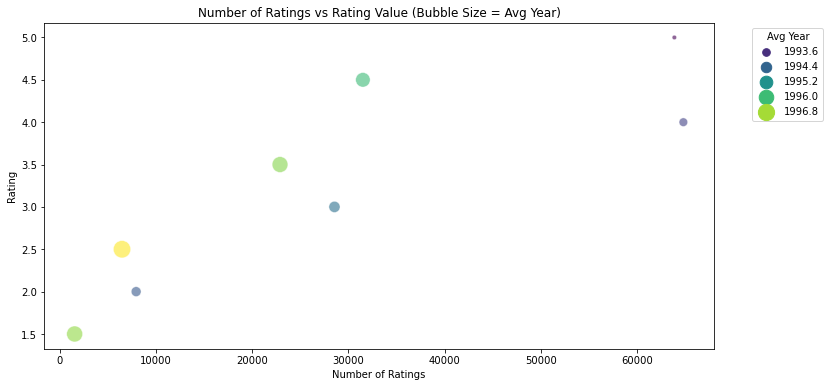

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aggregate data: count of ratings, average rating, average year
rating_summary = df_merge_cleaned.groupby('rating').agg(
    count=('rating', 'count'),
    mean_year=('year', 'mean')
).reset_index()

# Scatterplot using the aggregated data
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=rating_summary,
    x='count',            # Number of ratings
    y='rating',           # The actual rating value (e.g., 4.5, 3.0, etc.)
    size='mean_year',     # Bubble size: average year of those ratings
    hue='mean_year',
    sizes=(20, 300), palette='viridis', alpha=0.6
)
plt.title("Number of Ratings vs Rating Value (Bubble Size = Avg Year)")
plt.xlabel("Number of Ratings")
plt.ylabel("Rating")
plt.legend(title='Avg Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



# Preprocessing

###Encoding

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
#One-hot encoding
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df_exploded['genres'].str.split('|'))
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)


df_exploded = pd.concat([df_exploded, genre_df], axis=1)


print(df_exploded.head())


   movieId      title     genres  userId_rating  rating    timestamp_rating  \
0        1  Toy Story  Adventure              1     4.0 2000-07-30 18:45:03   
1        1  Toy Story  Animation              1     4.0 2000-07-30 18:45:03   
2        1  Toy Story   Children              1     4.0 2000-07-30 18:45:03   
3        1  Toy Story     Comedy              1     4.0 2000-07-30 18:45:03   
4        1  Toy Story    Fantasy              1     4.0 2000-07-30 18:45:03   

   userId_tag    tag       timestamp_tag       year  ...  Film-Noir  Horror  \
0         336  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
1         336  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
2         336  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
3         336  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
4         336  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   

   IMAX  Musical  Mystery  Romance  Sci-Fi  Thrill

In [38]:


# Initialize LabelEncoders
# user_encoder = LabelEncoder()
# movie_encoder = LabelEncoder()

# # Fit and transform user IDs
# df_merge_cleaned['userId_encoded'] = user_encoder.fit_transform(df_merge_cleaned['userId_rating'])

# # Fit and transform movie IDs
# df_merge_cleaned['movieId_encoded'] = movie_encoder.fit_transform(df_merge_cleaned['movieId'])

# df_merge_cleaned['userId_tag_encoded'] = userId_tag_encoder.fit_transform(df_merge_cleaned['userId_tag'])

# print(df_merge_cleaned.head())


In [39]:
# Initialize LabelEncoders
# user_encoder = LabelEncoder()
# movie_encoder = LabelEncoder()
# userid_encoder = LabelEncoder()


# df_exploded['userId_encoded'] = user_encoder.fit_transform(df_exploded['userId_rating'])


# df_exploded['movieId_encoded'] = movie_encoder.fit_transform(df_exploded['movieId'])

# df_exploded['userId_tag_encoded'] = userid_encoder.fit_transform(df_exploded['userId_tag'])

# print(df_exploded.head())


In [40]:
# Initialize LabelEncoders
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()
userid_encoder = LabelEncoder()


df_exploded['userId_rating'] = user_encoder.fit_transform(df_exploded['userId_rating'])


df_exploded['movieId'] = movie_encoder.fit_transform(df_exploded['movieId'])

df_exploded['userId_tag'] = userid_encoder.fit_transform(df_exploded['userId_tag'])

print(df_exploded.head())

   movieId      title     genres  userId_rating  rating    timestamp_rating  \
0        0  Toy Story  Adventure              0     4.0 2000-07-30 18:45:03   
1        0  Toy Story  Animation              0     4.0 2000-07-30 18:45:03   
2        0  Toy Story   Children              0     4.0 2000-07-30 18:45:03   
3        0  Toy Story     Comedy              0     4.0 2000-07-30 18:45:03   
4        0  Toy Story    Fantasy              0     4.0 2000-07-30 18:45:03   

   userId_tag    tag       timestamp_tag       year  ...  Film-Noir  Horror  \
0          32  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
1          32  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
2          32  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
3          32  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   
4          32  pixar 2006-02-04 09:36:04 1995-01-01  ...          0       0   

   IMAX  Musical  Mystery  Romance  Sci-Fi  Thrill

In [41]:
# The utility matrix was already created in the provided code:
utility_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')

# To print the first few rows:
print(utility_matrix.head())


movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     N

In [42]:

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df_exploded['tag'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
print(tfidf_df.head())


    06  1900s  1920s  1950s  1960s  1970s  1980s  1990s  2001  250  ...  york  \
0  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0  ...   0.0   
1  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0  ...   0.0   
2  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0  ...   0.0   
3  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0  ...   0.0   
4  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   0.0  0.0  ...   0.0   

   you  younger  your  zellweger  zither  zoe  zombie  zombies  zooey  
0  0.0      0.0   0.0        0.0     0.0  0.0     0.0      0.0    0.0  
1  0.0      0.0   0.0        0.0     0.0  0.0     0.0      0.0    0.0  
2  0.0      0.0   0.0        0.0     0.0  0.0     0.0      0.0    0.0  
3  0.0      0.0   0.0        0.0     0.0  0.0     0.0      0.0    0.0  
4  0.0      0.0   0.0        0.0     0.0  0.0     0.0      0.0    0.0  

[5 rows x 1741 columns]


## Scaling



In [43]:
# perform minmax scaler for rating

# Assuming 'df_merge_cleaned' is your DataFrame and 'rating' is the column you want to scale
scaler = MinMaxScaler()
df_exploded['rating'] = scaler.fit_transform(df_exploded[['rating']])
df_exploded.head()


,movieId,title,genres,userId_rating,rating,timestamp_rating,userId_tag,tag,timestamp_tag,year,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,Toy Story,Adventure,0,0.714286,2000-07-30 18:45:03,32,pixar,2006-02-04 09:36:04,1995-01-01,...,0,0,0,0,0,0,0,0,0,0
1,0,Toy Story,Animation,0,0.714286,2000-07-30 18:45:03,32,pixar,2006-02-04 09:36:04,1995-01-01,...,0,0,0,0,0,0,0,0,0,0
2,0,Toy Story,Children,0,0.714286,2000-07-30 18:45:03,32,pixar,2006-02-04 09:36:04,1995-01-01,...,0,0,0,0,0,0,0,0,0,0
3,0,Toy Story,Comedy,0,0.714286,2000-07-30 18:45:03,32,pixar,2006-02-04 09:36:04,1995-01-01,...,0,0,0,0,0,0,0,0,0,0
4,0,Toy Story,Fantasy,0,0.714286,2000-07-30 18:45:03,32,pixar,2006-02-04 09:36:04,1995-01-01,...,0,0,0,0,0,0,0,0,0,0


#Modeling

In [45]:
# prompt: generate a train,validation and test split using df_exploded dataset.

from sklearn.model_selection import train_test_split

# Assuming df_exploded is your preprocessed DataFrame
train_df, temp_df = train_test_split(df_exploded, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

print(f"Train set shape: {train_df.shape}")
print(f"Validation set shape: {val_df.shape}")
print(f"Test set shape: {test_df.shape}")


Train set shape: (522984, 30)
Validation set shape: (112068, 30)
Test set shape: (112069, 30)


### User Based Collaborative Filtering

In [47]:

from sklearn.neighbors import NearestNeighbors

# Assuming 'utility_matrix' is your user-item rating matrix
# and it has been preprocessed as shown in the provided code

# Fill NaN values with 0 for KNN
utility_matrix_filled = utility_matrix.fillna(0)

# Fit KNN model
knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5)
knn_model.fit(utility_matrix_filled)

# Function to get KNN recommendations
def get_knn_recommendations(user_id, n=5):
    # Find similar users
    distances, indices = knn_model.kneighbors(utility_matrix_filled.iloc[user_id -1].values.reshape(1, -1), n_neighbors=6) # Exclude the user themself

    similar_user_ids = indices.flatten()[1:] # Exclude the first element which is the user themself
    similar_user_distances = distances.flatten()[1:]

    # Get the ratings of similar users for movies not yet rated by the target user
    weighted_ratings = {}

    for i, user in enumerate(similar_user_ids):
        for movie, rating in utility_matrix.iloc[user].items():
            if pd.notna(rating) and movie not in utility_matrix.iloc[user_id-1].dropna().index:
                weighted_ratings.setdefault(movie, 0)
                weighted_ratings[movie] += rating * (1 - similar_user_distances[i])

    # Normalize the weighted ratings
    for movie, rating in weighted_ratings.items():
        weighted_ratings[movie] = rating / sum(1 - similar_user_distances)

    # Sort and return top N recommendations
    recommendations = sorted(weighted_ratings.items(), key=lambda x: x[1], reverse=True)[:n]
    return recommendations


# Get recommendations for user 1
recommendations_user1 = get_knn_recommendations(user_id=1)

# print("\nKNN Recommendations for user 1:")
recommendations_user1


[(1200, 4.80100193758383),
 (1610, 4.298950005529132),
 (541, 4.004742155042099),
 (589, 4.003711070249842),
 (1036, 4.0)]

In [48]:
# prompt: generate user based collaborative filtering using the train test split without KNN

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'utility_matrix' is your user-item rating matrix
# and it has been preprocessed as shown in the provided code

# Fill NaN values with 0 for similarity calculation
utility_matrix_filled = utility_matrix.fillna(0)

# Calculate user similarity using cosine similarity
user_similarity = cosine_similarity(utility_matrix_filled)

# Convert to DataFrame for easier handling
user_similarity_df = pd.DataFrame(user_similarity, index=utility_matrix.index, columns=utility_matrix.index)

def get_user_based_recommendations(user_id, n=5):
    # Find similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:11] #Exclude the user themself

    # Calculate weighted ratings based on similar users
    weighted_ratings = utility_matrix.loc[similar_users.index].T.dot(similar_users)
    normalization = similar_users.sum()
    scores = weighted_ratings / normalization

    # Exclude movies already rated by the user
    known_movies = utility_matrix.loc[user_id].dropna().index
    scores = scores.drop(known_movies, errors='ignore')

    # Return top N recommendations
    return scores.sort_values(ascending=False).head(n)

# Example usage: Get recommendations for user 1
recommendations_user1 = get_user_based_recommendations(user_id=1)
recommendations_user1


movieId
589     4.195979
1610    3.957980
924     3.855366
1036    3.805436
1968    3.574258
dtype: float64

### Item Based Collaborative Filtering

In [49]:
# item_similarity = cosine_similarity(utility_matrix.fillna(0).T)
# item_similarity_df = pd.DataFrame(item_similarity, index=utility_matrix.columns, columns=utility_matrix.columns)

# def get_item_based_recommendations(user_id, n=5):
#     user_ratings = utility_matrix.loc[user_id].dropna()
#     scores = item_similarity_df[user_ratings.index].dot(user_ratings)
#     scores /= item_similarity_df[user_ratings.index].sum(axis=1)
#     scores = scores.drop(user_ratings.index, errors='ignore')
#     return scores.sort_values(ascending=False).head(n)

# print("\nItem-Based CF Recommendations:")
# print(get_item_based_recommendations(user_id=1))

In [50]:
# prompt: generate code for item based collaborative filtering using train test split without KNN

def get_item_based_recommendations(user_id, n=5, train_df=train_df):
    """
    Generates item-based collaborative filtering recommendations without KNN.

    Args:
        user_id: The ID of the user for whom to generate recommendations.
        n: The number of recommendations to return.
        train_df: Training DataFrame (required for utility matrix).

    Returns:
        A Pandas Series containing the top N recommended movie IDs and their predicted ratings.
    """
    # Create utility matrix from the training data
    utility_matrix = train_df.pivot_table(index='userId_rating', columns='movieId', values='rating')

    # Calculate item similarity using cosine similarity
    item_similarity = cosine_similarity(utility_matrix.fillna(0).T)
    item_similarity_df = pd.DataFrame(item_similarity, index=utility_matrix.columns, columns=utility_matrix.columns)

    # Get the user's ratings from the utility matrix
    user_ratings = utility_matrix.loc[user_id].dropna()

    if user_ratings.empty:  # Handle cases where the user has no ratings in the training set
        return pd.Series(dtype=float)  # Return empty series or handle it differently

    # Predict ratings for unrated items
    scores = item_similarity_df[user_ratings.index].dot(user_ratings)
    scores /= item_similarity_df[user_ratings.index].sum(axis=1)
    scores = scores.drop(user_ratings.index, errors='ignore')

    return scores.sort_values(ascending=False).head(n)

# Example usage:
recommendations = get_item_based_recommendations(user_id=1)
recommendations


movieId
1525    0.916312
1459    0.857143
1492    0.837433
1538    0.837433
1485    0.837433
dtype: float64

In [51]:
# prompt: generate code for item based collaborative filtering using train test data using KNN

# Assuming 'utility_matrix' is your user-item rating matrix
# and it has been preprocessed as shown in the provided code

# Fill NaN values with 0 for similarity calculation
utility_matrix_filled = utility_matrix.fillna(0)

# Calculate item similarity using cosine similarity
item_similarity = cosine_similarity(utility_matrix_filled.T)

# Convert to DataFrame for easier handling
item_similarity_df = pd.DataFrame(item_similarity, index=utility_matrix.columns, columns=utility_matrix.columns)

def get_item_based_recommendations(user_id, n=5):
    """
    Generates item-based collaborative filtering recommendations.

    Args:
        user_id: The ID of the user for whom to generate recommendations.
        n: The number of recommendations to return.

    Returns:
        A Pandas Series containing the top N recommended movie IDs and their predicted ratings.
    """
    # Get the user's ratings from the utility matrix
    user_ratings = utility_matrix.loc[user_id].dropna()

    if user_ratings.empty:  # Handle cases where the user has no ratings
        return pd.Series(dtype=float)  # Return empty series or handle it differently

    # Predict ratings for unrated items
    scores = item_similarity_df[user_ratings.index].dot(user_ratings)
    scores /= item_similarity_df[user_ratings.index].sum(axis=1)
    scores = scores.drop(user_ratings.index, errors='ignore')

    return scores.sort_values(ascending=False).head(n)

# Example usage: Get recommendations for user 1
recommendations_user1 = get_item_based_recommendations(user_id=1)
recommendations_user1


movieId
2896      5.0
175585    5.0
183911    5.0
158035    5.0
157369    5.0
dtype: float64

### Matrix Vectorisation using SVD

In [52]:
# # Model 3: Matrix Factorization using SVD
# imputer = SimpleImputer(strategy='mean')
# filled_matrix = imputer.fit_transform(utility_matrix)
# svd = TruncatedSVD(n_components=20)
# matrix_svd = svd.fit_transform(filled_matrix)



In [53]:
# prompt: generate recommendation using SVD for user 1

from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer

# Assuming 'utility_matrix' is your user-item rating matrix
# and it has been preprocessed as shown in the provided code

# Fill NaN values with the mean for SVD
imputer = SimpleImputer(strategy='mean')
filled_matrix = imputer.fit_transform(utility_matrix)

# Apply SVD
svd = TruncatedSVD(n_components=20)  # You can adjust the number of components
matrix_svd = svd.fit_transform(filled_matrix)

# Function to get SVD recommendations
def get_svd_recommendations(user_id, n=5):
    user_ratings = matrix_svd[user_id -1] # Get the user's latent factor vector
    similarities = cosine_similarity([user_ratings], matrix_svd) # Calculate cosine similarity with other users

    # Exclude the user themself
    similarities = similarities.flatten()
    similarities[user_id - 1] = -1  # Set similarity with self to -1 for exclusion
    similar_users = similarities.argsort()[::-1][:10]  # Find top 10 similar users (excluding self)

    # Predict ratings based on similar users
    weighted_ratings = {}
    for user in similar_users:
        for movie in utility_matrix.columns:
            rating = utility_matrix.iloc[user][movie]
            if pd.notna(rating) and movie not in utility_matrix.iloc[user_id-1].dropna().index:
                weighted_ratings.setdefault(movie, 0)
                weighted_ratings[movie] += rating * similarities[user]

    # Normalize weighted ratings
    for movie, rating in weighted_ratings.items():
        weighted_ratings[movie] = rating / sum(similarities[similar_users])

    recommendations = sorted(weighted_ratings.items(), key=lambda x: x[1], reverse=True)[:n]
    return recommendations


# Get SVD recommendations for user 1
svd_recommendations_user1 = get_svd_recommendations(user_id=1)
svd_recommendations_user1


[(1259, 2.950004768329013),
 (541, 2.7999988472963326),
 (589, 2.750010478169515),
 (1968, 2.70001231154575),
 (150, 2.6000004786160473)]

### Content Based Filtering

In [56]:
 # content based filtering using above train test data and give recommendations
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_content_based_recommendations(movie_title, n=5, df_exploded=None):
    """
    Generates content-based filtering recommendations based on movie title.

    Args:
        movie_title: The title of the movie for which to find similar movies.
        n: Number of recommendations to return.
        df_exploded: DataFrame with movieId, title, and tag.

    Returns:
        A list of recommended movie titles.
    """

    if df_exploded is None:
        return ["Error: DataFrame not provided."]

    # Handle missing tags and group by movieId to avoid duplicates
    df_grouped = df_exploded.groupby(['movieId', 'title'])['tag'].apply(lambda x: ' '.join(x.dropna())).reset_index()

    # Check if movie exists
    if movie_title not in df_grouped['title'].values:
        print(f"Movie '{movie_title}' not found in the dataset.")
        return []

    # Create TF-IDF matrix from tags
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df_grouped['tag'].fillna(''))

    # Find the index of the movie
    idx = df_grouped[df_grouped['title'] == movie_title].index[0]

    # Compute cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Get similarity scores for the movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort and get top N
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n+1]  # Exclude the input movie

    # Get movie indices and titles
    movie_indices = [i[0] for i in sim_scores]
    recommended_titles = df_grouped['title'].iloc[movie_indices].tolist()

    return recommended_titles


# ====== Example Usage ======
# Sample dummy data (Replace with your df_exploded)
sample_data = df_exploded
    
df_exploded = pd.DataFrame(sample_data)

# Run the function
recommendations = get_content_based_recommendations("Toy Story", n=5, df_exploded=df_exploded)

# Output
print("Top 5 content-based recommendations for 'Toy Story':")
for i, title in enumerate(recommendations, 1):
    print(f"{i}. {title}")


Top 5 content-based recommendations for 'Toy Story':
1. Bug's Life, A
2. Toy Story 2
3. Guardians of the Galaxy 2
4. Up
5. Big Hero 6


### Hybrid: Content based + User Based Collaborative filtering





In [57]:
#generate a hybrid model for both content based and user based collaborative filtering

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

def hybrid_recommendations(user_id, movie_title, n=5, train_df=None):
    """
    Generates hybrid recommendations combining content-based and collaborative filtering.
    Memory-efficient and error-handled.
    """

    # === Basic Checks === #
    if train_df is None:
        return ["Error: train_df must be provided."]
    
    required_cols = {'userId_tag', 'movieId', 'title', 'tag', 'rating'}
    if not required_cols.issubset(train_df.columns):
        return [f"Error: Dataset must contain columns {required_cols}"]

    if movie_title not in train_df['title'].values:
        return [f"Error: Movie '{movie_title}' not found in dataset."]

    if user_id not in train_df['userId_tag'].unique():
        return [f"Error: User ID '{user_id}' not found in dataset."]

    # === Step 1: Content-Based Filtering === #
    tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
    tfidf_matrix = tfidf.fit_transform(train_df['tag'].fillna(''))

    # Get the movie index
    movie_idx = train_df[train_df['title'] == movie_title].index[0]

    # Compute cosine similarity with all movies
    query_vec = tfidf_matrix[movie_idx]
    content_sim = cosine_similarity(query_vec, tfidf_matrix).flatten()

    # Top similar movies based on content
    content_scores = list(enumerate(content_sim))
    content_scores = sorted(content_scores, key=lambda x: x[1], reverse=True)
    content_scores = content_scores[1:n+10]  # Get more to merge later
    content_indices = [i[0] for i in content_scores]
    content_titles = train_df.iloc[content_indices]['title'].tolist()

    # === Step 2: Collaborative Filtering === #
    # Create user-movie rating matrix
    utility_matrix = train_df.pivot_table(index='userId_tag', columns='movieId', values='rating')
    utility_matrix = utility_matrix.fillna(0)

    user_idx = list(utility_matrix.index).index(user_id)

    user_sim_matrix = cosine_similarity(utility_matrix)
    sim_users = user_sim_matrix[user_idx]

    # Weighted sum of ratings from similar users
    weighted_scores = np.dot(user_sim_matrix[user_idx], utility_matrix.values)
    normalization = np.sum(sim_users)
    
    if normalization == 0:
        collab_scores = pd.Series(weighted_scores, index=utility_matrix.columns)
    else:
        collab_scores = pd.Series(weighted_scores / normalization, index=utility_matrix.columns)

    # Filter out movies the user has already rated
    watched_movies = utility_matrix.loc[user_id]
    collab_scores = collab_scores[watched_movies == 0]

    # Get top movie IDs from collaborative filtering
    top_collab_movie_ids = collab_scores.sort_values(ascending=False).head(n+10).index
    movie_id_title_map = train_df.drop_duplicates('movieId').set_index('movieId')['title'].to_dict()
    collab_titles = [movie_id_title_map.get(mid) for mid in top_collab_movie_ids if movie_id_title_map.get(mid)]

    # === Step 3: Combine Recommendations === #
    combined = list(dict.fromkeys(content_titles + collab_titles))  # Remove duplicates
    return combined[:n]


# === Example Dummy Data === #
sample_data = df_exploded
    
train_df = pd.DataFrame(sample_data)

# === Test the Function === #
recs = hybrid_recommendations(user_id=1, movie_title="Toy Story", n=5, train_df=train_df)

print("Hybrid Recommendations for User 1 and 'Toy Story':")
for i, title in enumerate(recs, 1):
    print(f"{i}. {title}")


Hybrid Recommendations for User 1 and 'Toy Story':
1. Toy Story
2. Dark Knight Rises, The
3. 3:10 to Yuma
4. Sixth Sense, The
5. Jezebel


## Visualisation

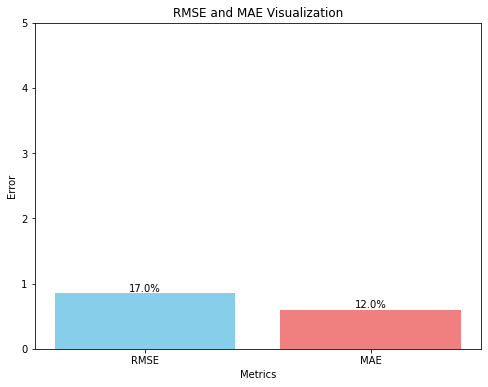

In [58]:
# prompt: generate a code that gives visualisation of RMSE or MAE and also shows the percentage on the graph

import matplotlib.pyplot as plt

def visualize_rmse_mae(rmse, mae):
    """Visualizes RMSE and MAE with percentages.

    Args:
        rmse: The Root Mean Squared Error.
        mae: The Mean Absolute Error.
    """

    metrics = ['RMSE', 'MAE']
    values = [rmse, mae]

    # Calculate percentages (assuming a maximum possible error of 5 for demonstration)
    max_error = 5  # Replace with your actual maximum possible error or a suitable value
    percentages = [(value / max_error) * 100 for value in values]

    plt.figure(figsize=(8, 6))
    bars = plt.bar(metrics, values, color=['skyblue', 'lightcoral'])

    # Add percentage labels on top of the bars
    for bar, percentage in zip(bars, percentages):
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.xlabel('Metrics')
    plt.ylabel('Error')
    plt.title('RMSE and MAE Visualization')
    plt.ylim(0, max_error)  # Set y-axis limit to accommodate percentages
    plt.show()


# Example usage (replace with your actual RMSE and MAE values):
rmse_value = 0.85
mae_value = 0.6

visualize_rmse_mae(rmse_value, mae_value)


In [ ]:
from sklearn.metrics import mean_absolute_error

def evaluate_model(true_ratings, predicted_ratings):
    mae = mean_absolute_error(true_ratings, predicted_ratings)
    rmse = sqrt(mean_squared_error(true_ratings, predicted_ratings))
    return mae, rmse

In [60]:
# prompt: generate a code for neural net recommender system

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# === Load your actual DataFrame (replace df_exploded with your data) === #
df = df_exploded.copy()

# === Encode userId and movieId === #
user_encoder = LabelEncoder()
movie_encoder = LabelEncoder()
df['user'] = user_encoder.fit_transform(df['userId_tag'])
df['movie'] = movie_encoder.fit_transform(df['movieId'])

num_users = df['user'].nunique()
num_movies = df['movie'].nunique()

# === Lightweight Neural Network Model === #
def create_fast_neural_net(num_users, num_movies, embedding_dim=16):
    user_input = keras.Input(shape=(1,), name='user_input')
    movie_input = keras.Input(shape=(1,), name='movie_input')

    user_embedding = layers.Embedding(num_users, embedding_dim)(user_input)
    movie_embedding = layers.Embedding(num_movies, embedding_dim)(movie_input)

    user_vec = layers.Flatten()(user_embedding)
    movie_vec = layers.Flatten()(movie_embedding)

    merged = layers.Concatenate()([user_vec, movie_vec])
    dense = layers.Dense(32, activation='relu')(merged)
    output = layers.Dense(1)(dense)

    model = keras.Model(inputs=[user_input, movie_input], outputs=output)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = create_fast_neural_net(num_users, num_movies)
model.summary()

# === Prepare Training Data === #
X_user = df['user'].values
X_movie = df['movie'].values
y = df['rating'].values

train_user, test_user, train_movie, test_movie, y_train, y_test = train_test_split(
    X_user, X_movie, y, test_size=0.2, random_state=42
)

# === Fast Training === #
history = model.fit(
    [train_user, train_movie],
    y_train,
    epochs=5,               # Reduced epochs
    batch_size=32,          # Larger batch size for speed
    validation_split=0.1,
    verbose=1
)

# === Evaluation === #
loss, mae = model.evaluate([test_user, test_movie], y_test, verbose=0)
print(f"\n✅ MAE on Test Set: {mae:.4f}")

# === Prediction Sample === #
predictions = model.predict([test_user[:5], test_movie[:5]])
print("\n🔮 Sample Predictions:")
for u, m, pred in zip(test_user[:5], test_movie[:5], predictions):
    real_user = user_encoder.inverse_transform([u])[0]
    real_movie = movie_encoder.inverse_transform([m])[0]
    print(f"User {real_user} → Movie {real_movie}: Predicted Rating = {pred[0]:.2f}")


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_input (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
movie_input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 16)        896         user_input[0][0]                 
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 1, 16)        24816       movie_input[0][0]                
_______________________________________________________________________________________